<a href="https://colab.research.google.com/github/samsura89/python_class/blob/master/02_DC_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TOC


0. [Slides](https://soph.info/slides/odsc2019.pdf)
1.   [Neural Net Theory](https://colab.research.google.com/gist/artificialsoph/1032e89227b1fe7707d6ea5e533e0b9c/01_nn_theory.ipynb)
2.   [Deep Convolutional GANs](https://colab.research.google.com/gist/artificialsoph/ade40c6da14505a8b56a5b4904d5d061/0-dc-gan.ipynb)
3.   [Advanced GANs](https://colab.research.google.com/gist/artificialsoph/968b60b40108f8516c3cc57e291ff9cb/1-advanced-gans.ipynb)
3.   [Multilable Conditional GANs](https://colab.research.google.com/gist/artificialsoph/14b5acca09b486fb693f83b5c09e916a/2-multilabel-conditional-gans.ipynb)



In [1]:
#######################
# standard code block #
#######################

# see https://ipython.readthedocs.io/en/stable/interactive/magics.html
%pylab inline

# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

#######################
#       imports       #
#######################
import pandas as pd
import seaborn as sns
import sklearn

!wget http://soph.info/metis/soph.py
from soph import plot_decision_boundary

sns.set_style("whitegrid")

Populating the interactive namespace from numpy and matplotlib
--2019-05-01 15:46:37--  http://soph.info/metis/soph.py
Resolving soph.info (soph.info)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to soph.info (soph.info)|185.199.108.153|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://soph.info/metis/soph.py [following]
--2019-05-01 15:46:37--  https://soph.info/metis/soph.py
Connecting to soph.info (soph.info)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13115 (13K) [application/octet-stream]
Saving to: ‘soph.py’

soph.py             100%[===================>]  12.81K  --.-KB/s    in 0s      

2019-05-01 15:46:37 (173 MB/s) - ‘soph.py’ saved [13115/13115]



Using TensorFlow backend.


In [0]:
import keras
import keras.backend as K
import numpy as np
import functools
from tqdm import tqdm, tqdm_notebook

In [0]:
from IPython.display import SVG

def plot_model(model):
    return SVG(keras.utils.vis_utils.model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

# Review: Building a deep convolutional classifier

## Download and prep the data

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 47s 0us/step


In [6]:
# we can see that the range of pixels is 0-255. 
# We'll go ahead and scale it from -1 to 1
# This will be important later
print("original range of pixels", x_train.min(), x_train.max())

x_train = (2/255)*x_train - 1
x_test = (2/255)*x_test - 1

print("new range of pixels", x_train.min(), x_train.max())

original range of pixels 0 255
new range of pixels -1.0 1.0


## Build the classifier

Here, we're going to use several convolutional layers to summarize the inputs in steps. Then we'll ask the classifier to pick which class the image belongs to.

In [0]:
conv = functools.partial(keras.layers.Conv2D, filters=50, kernel_size=3, strides=2, activation="relu", padding="same")

Aside: We're going to be using several similar layers. Instead of writing out `keras.layers.Conv2D(50, 3, strides=2, activation="relu", padding="same")` several times, we can use the `functools` package to wrap the `keras.layers.Conv2D` function with the parameters we'll be using over and over. Then we can just change what we need to each time.

In [0]:
num_classes = len(np.unique(y_train))

In [10]:
classifier = keras.Sequential([
    keras.layers.InputLayer(input_shape=x_train.shape[1:]),
    
    conv(),
    conv(),
    conv(),
    keras.layers.Flatten(),
    keras.layers.Dense(num_classes, activation="softmax")
    
])

classifier.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 50)        1400      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 50)          22550     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 50)          22550     
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8010      
Total params: 54,510
Trainable params: 54,510
Non-trainable params: 0
_________________________________________________________________


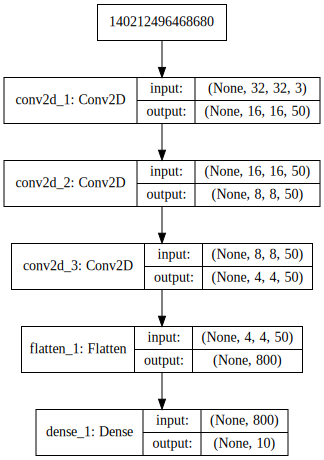

In [11]:
plot_model(classifier)

In [0]:
classifier.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['acc'])

In [13]:
classifier.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=10)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 13s 258us/step - loss: 1.4714 - acc: 0.4729 - val_loss: 1.2448 - val_acc: 0.5525
Epoch 2/10
50000/50000 [==============================] - 8s 150us/step - loss: 1.1496 - acc: 0.5919 - val_loss: 1.1068 - val_acc: 0.6073
Epoch 3/10
50000/50000 [==============================] - 7s 148us/step - loss: 1.0090 - acc: 0.6441 - val_loss: 1.0329 - val_acc: 0.6356
Epoch 4/10
50000/50000 [==============================] - 7s 148us/step - loss: 0.9074 - acc: 0.6804 - val_loss: 0.9664 - val_acc: 0.6584
Epoch 5/10
50000/50000 [==============================] - 7s 148us/step - loss: 0.8304 - acc: 0.7096 - val_loss: 0.9467 - val_acc: 0.6753
Epoch 6/10
50000/50000 [==============================] - 7s 148us/step - loss: 0.7715 - acc: 0.7274 - val_loss: 0.9217 - val_acc: 0.6844
Epoch 7/10
50000/50000 [==============================] - 7s 148us/step -

## Exercise: Improve Classifier

(15 minutes) If time permits, see if you can improve the above classifier without significantly increasing the training time. If we don't get to this, students are encouraged to attempt this at home.

In [0]:
classifier = keras.Sequential([
    keras.layers.InputLayer(input_shape=x_train.shape[1:]),
    

    keras.layers.Dense(num_classes, activation="softmax")
    
])
classifier.compile(optimizer=keras.optimizers.Adam(), loss="sparse_categorical_crossentropy", metrics=['acc'])
classifier.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=10)

# From classifiers to Generative Adversarial Networks

Below is the typical Deep Convolutional Classifier structure:

```
Dimensions     Layer Type
----------     ----------
[32 x 32 x 3]  Input 
               ... <preprocessing layers> ...
[16 x 16 x 50] Convolution (+ BN + Pooling + Strides) 
               ... <multiple conv layers> ...
[ 4 x  4 x 50] Convolution (+ BN + Pooling + Strides) 
               ... <flatten or global pool layers> ...
[10]           Dense
```

As you saw above, the convolution layers serve to process the input data through several steps. Above, we used a stride of two to shrink the height and width of each layer as we approached the output. Pooling can be used in place of strided convolution. 

Ultimately, we want to give the network the framework for processing and summarizing the input data in steps as it prepares to make a prediction.

To build a GAN, we need to build two separate networks: a **discriminator** and a **generator**. 

The discriminator will function much like the classifiers we've just built. It will take an image as input and make a class prediction. The difference is that now, the discriminator will be classifying each image as either "real" or "fake". 

The generator will be a bit different. We want it to generate images that are *similar* to the training data. Now, consider the Generator's task. We could set it up to learn the **single image** (whatever that looks like) that is most similar to the 60,000 images in our training data. But if that's what the generator tried, the discriminator could easily catch it. Instead, we want the generator to produce **random images** so that each individual image looks like it could be from the training data. Then as long as our discriminator doesn't memorize the training data, the generator can fool it.

In [0]:
cifar_labels = [
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse',
    'ship', 'truck'
]

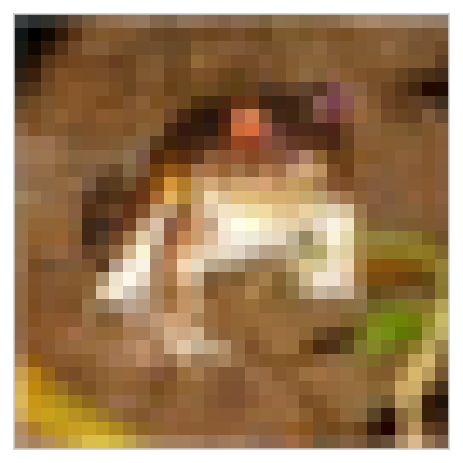

In [15]:
fig = imshow((x_train[0,...]+1)/2)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

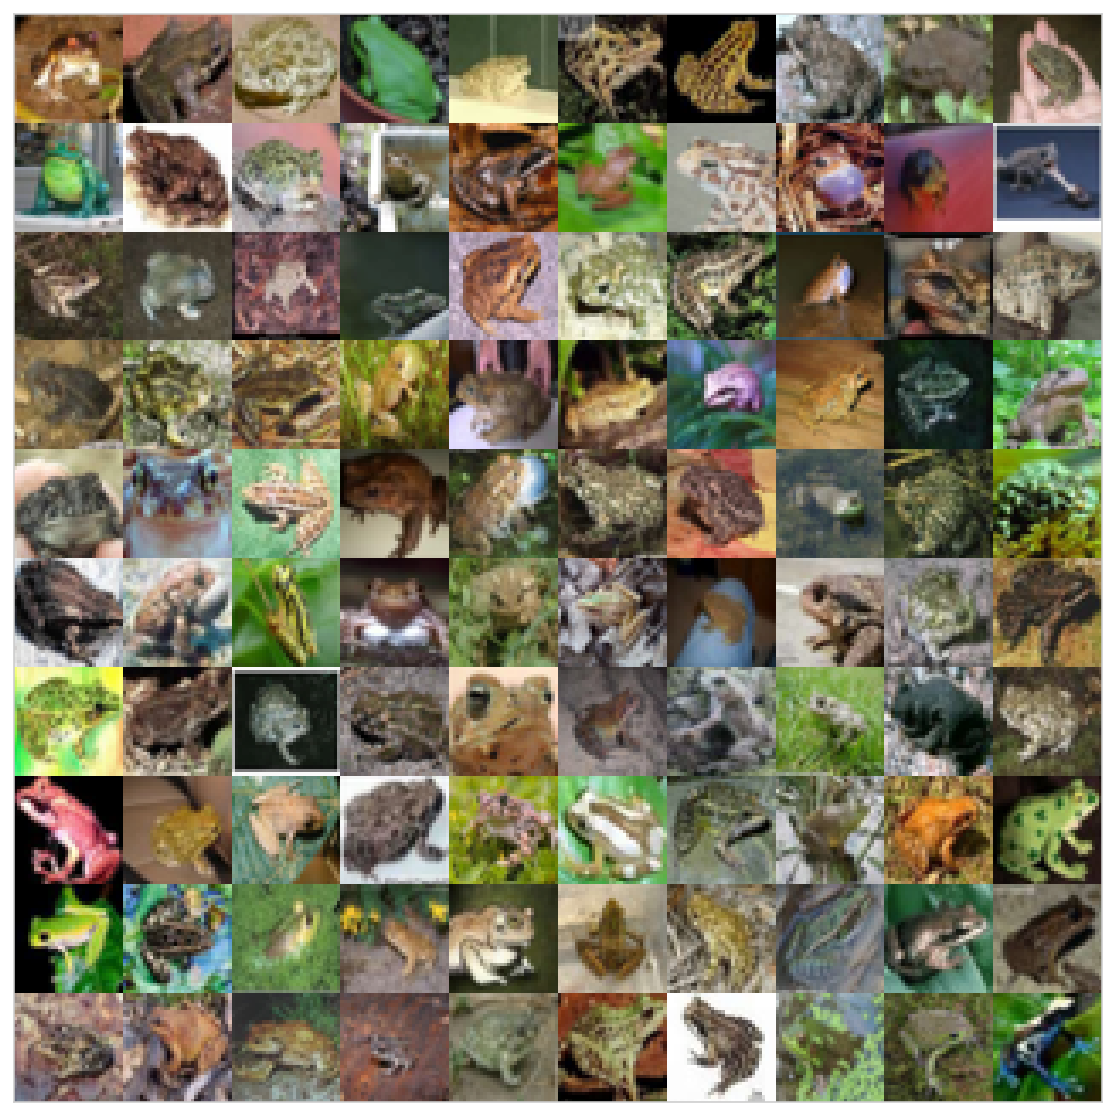

In [17]:
sample_side = 10
im_size = 32

frog_i,_ = np.where(y_train==6)
frog_x = x_train[frog_i,...]
frog_x = frog_x[:sample_side*sample_side]

# Rescale images 0 - 255
frog_x = (frog_x+1)/2

frog_x = frog_x.reshape(sample_side,sample_side*im_size,im_size,3)
frog_x = frog_x.transpose((0,2,1,3))
frog_x = frog_x.reshape(sample_side*im_size,sample_side*im_size,3)
frog_x = frog_x.transpose((1,0,2))

figsize(10, 10)

fig = imshow(frog_x)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

## Aside: frogs and distributions

Our little CIFAR10 dataset contains 10 classes. One of those is frog. Look at these frogs and see what you notice about them? What strategies would you use if I told you to start drawing pictures of frogs that would fool someone trying to distinguish your drawings from these?

Well, for one, most of the frogs are either green or brown blobs on top of a green or brown surface. But not all of them! If you truly wanted to fool the discriminator as well as possible, you wouldn't just want to be able to draw a frog well, you would want to be able to mimic the variety of frogs that the discriminator sees in the training data. If you never drew red frogs, then you would just make the discriminators job that much easier. 

So, because we've tasked the generator with fooling the discriminator, it won't do for the generator to just draw things well, it will have to model the *distribution of training data*.

This is what makes GANs distinct from, say, a plain Autoencoder. The generator's ultimate goal is to learn the distribution of training data—in other words the entire world of possibilities that the training data came from. And in order to best the generator, the discriminator must also model that distribution. Once we're done, we have a model that can inform us about our data at deep level. 

## Building the generator

The structure of the generator is much like the discriminator in reverse. We'll start with a vector and use several layers to process that input. The successive layers will expand that input until it has the same width and height as the image. A final layer then shrinks the channels to the 3 color channels. We use `tanh` to squish the output to the interval `[-1, 1]`, which matches the preprocessing of our training data. 

```
Dimensions      Layer Type
----------      ----------
[100]           Input 
                ... <preprocessing layers> ...
[4 x 4 x 50]    Convolution (+ BN + upsampling + ConvTranspose) 
                ... <multiple conv layers> ...
[32 x  32 x 50] Convolution
[32 x 32 x 3]   Convolution (+ tanh)
```

In [18]:
lrelu = functools.partial(K.relu, alpha=.1)
z_len = 100

conv = functools.partial(
    keras.layers.Conv2D,
    filters=50,
    kernel_size=3,
    padding="same",
    activation=lrelu,
    strides=2,
)

disc = keras.Sequential([
    keras.layers.InputLayer(input_shape=(im_size, im_size, 3)),
    conv(),
    keras.layers.BatchNormalization(),
    conv(),
    keras.layers.BatchNormalization(),
    conv(),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation="sigmoid")
])

gen = keras.Sequential([
    keras.layers.InputLayer(input_shape=(z_len, )),
    keras.layers.Dense(50 * 4 * 4, activation=lrelu),
    keras.layers.Reshape((4, 4, 50)),
    keras.layers.BatchNormalization(),
    keras.layers.UpSampling2D(),
    

    conv(strides=1),
    keras.layers.BatchNormalization(),
    keras.layers.UpSampling2D(),
    conv(strides=1),
    keras.layers.BatchNormalization(),
    keras.layers.UpSampling2D(),

    
    conv(filters=3, strides=1, activation='tanh')
])

disc.summary()
gen.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 16, 16, 50)        1400      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 50)        200       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 50)          22550     
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 50)          200       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 50)          22550     
_________________________________________________________________
batch_normalization_3 (Batch (None, 4, 4, 50)          200       
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
__________

In [0]:
disc.compile(loss='binary_crossentropy',
            optimizer=keras.optimizers.Adam(lr=0.0002, beta_1=.5))

In [0]:
# The generator takes noise as input and generates imgs
z = keras.Input(shape=(z_len,))
img = gen(z)

# For the combined model we will only train the generator
disc.trainable = False

# The discriminator takes generated images as input and determines validity
valid = disc(img)

# The combined model  (stacked generator and discriminator)
# Trains the generator to fool the discriminator
comb = keras.Model(z, valid)
comb.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0002, beta_1=.5))

In [0]:
batch_size = 64

num_steps = x_train.shape[0]//batch_size

num_epochs = 10

valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

d_loss_list = []
g_loss_list = []

# this will be used for sampling after each epoch. 
# if we stick with the same set of noise, we can see how the generated images changes

noise_sample = np.random.normal(size=(sample_side**2, z_len))

for epoch_i in range(num_epochs):
    print(f"starting epoch {epoch_i}")
    
    for step_i in tqdm_notebook(range(num_steps)):
        
        idx = np.random.randint(0,x_train.shape[0], batch_size)
        
        x_batch = x_train[idx,...]
        
        noise_batch = np.random.normal(size=(batch_size, z_len))
        
        gen_batch = gen.predict(noise_batch)
        
        d_loss_valid = disc.train_on_batch(x_batch, valid)
        d_loss_fake = disc.train_on_batch(gen_batch, fake)
        d_loss_list.append(np.mean([d_loss_valid, d_loss_fake]))
        
        
        g_loss = comb.train_on_batch(noise_batch, valid)
        g_loss_list.append(g_loss)
        
    
    
    gen_sample = gen.predict(noise_sample)
    
    gen_sample = (gen_sample+1)/2
    
    gen_sample = gen_sample.reshape(sample_side,sample_side*im_size,im_size,3)
    gen_sample = gen_sample.transpose((0,2,1,3))
    gen_sample = gen_sample.reshape(sample_side*im_size,sample_side*im_size,3)
    gen_sample = gen_sample.transpose((1,0,2))
    
    
    plt.clf();
    plt.figure();
    plt.imshow(gen_sample)
    plt.show();
    
    
    print(f" disc loss: {np.mean(d_loss_list[-num_steps:])} gen loss: {np.mean(g_loss_list[-num_steps:])}")
    